In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [85]:

#Primera toma, bobina constante a 4A y espira cambiante
m1 = np.array([30,37.5,60,67.5,97.5]) #(mg)
i1 = np.array([1,1.5,2,2.5,3]) #(mg)
#Segundo toma, espira constante a 2A y bobina cambiante
m2 = np.array([24,30,37.5,45,52.5,60,63]) #(A)
i2 = np.array([1,1.5,2,2.5,3,3.5,4]) #(A)
#Otras medidas
l1 = 0.145 #longitud bobina de solenoide (m)
l2=0.038 #longitud anche de espira (m)

b1 =[]
b2=[]

for i in range(len(m1)):
    m1[i]=(m1[i]*pow(10,-5))*9.807
for i in range(len(m2)):
    m2[i]=(m2[i]*pow(10,-5))*9.807
    
#for i in range(len(i1)):
#    i1[i]=i1[i]*0.038
    
for i in range(len(i2)):
    i2[i]=i2[i]*0.143
    
for i in range(len(m1)):
    b1.append(m1[i]/(i1[i]))
    
for i in range(len(m2)):
    b2.append(m2[i]/(i2[i]))

tabla1 = pd.DataFrame({
    'I1':i1,'m1':m1, 'b1': b1})
tabla2 = pd.DataFrame({
    'I2':i2,'m2':m2, 'b2':b2
})
tabla1,tabla2

(    I1        m1        b1
 0  1.0  0.002942  0.002942
 1  1.5  0.003678  0.002452
 2  2.0  0.005884  0.002942
 3  2.5  0.006620  0.002648
 4  3.0  0.009562  0.003187,
        I2        m2        b2
 0  0.1430  0.002354  0.016459
 1  0.2145  0.002942  0.013716
 2  0.2860  0.003678  0.012859
 3  0.3575  0.004413  0.012344
 4  0.4290  0.005149  0.012002
 5  0.5005  0.005884  0.011757
 6  0.5720  0.006178  0.010801)

Pendiente (slope): 0.003236310000000001
Intersección (intercept): -0.0007355250000000016
Coeficiente de correlación (r): 0.9760921603577253
Coeficiente de determinación (R^2): 0.9527559055118113
Valor p (p-value): 0.00442161322740824
Error estándar (std_err): 0.000416075772185787


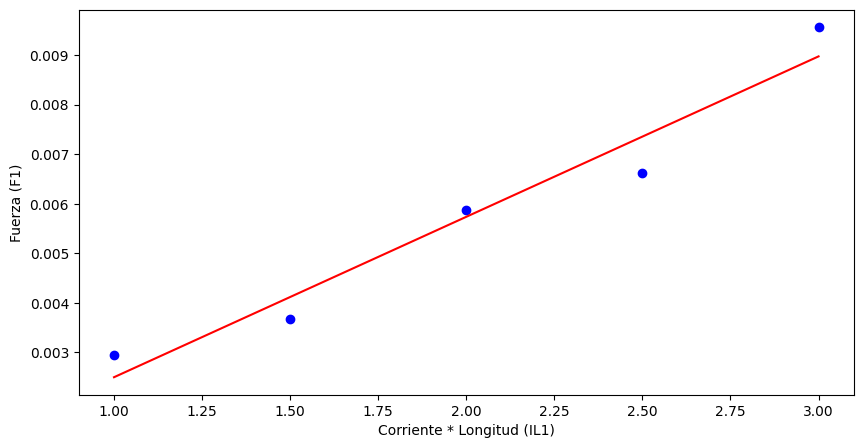

In [86]:
#PRIMERA GRÁFICA CON BOBINA CONSTANTE A 4A

def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    def model(x):
        return slope * x + intercept
    
    r_squared = r_value**2
    
    print('Pendiente (slope):', slope)
    print('Intersección (intercept):', intercept)
    print('Coeficiente de correlación (r):', r_value)
    print('Coeficiente de determinación (R^2):', r_squared)
    print('Valor p (p-value):', p_value)
    print('Error estándar (std_err):', std_err)
    
    return model, slope, intercept, r_squared, p_value, std_err


modelo, pendiente, interseccion, r_cuadrado, valor_p, error_std = linear_regression(i1, m1)


plt.figure(figsize=(10, 5))
plt.scatter(i1, m1, color='blue', label='Datos experimentales')
plt.plot(i1, modelo(np.array(i1)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado:.4f}$')
plt.xlabel('Corriente * Longitud (IL1)')
plt.ylabel('Fuerza (F1)')
#plt.legend()
plt.show()

Pendiente (slope): 0.009405314685314685
Intersección (intercept): 0.0010087200000000016
Coeficiente de correlación (r): 0.9963578851925451
Coeficiente de determinación (R^2): 0.9927290353853608
Valor p (p-value): 1.5345817383160258e-06
Error estándar (std_err): 0.0003599722163957309


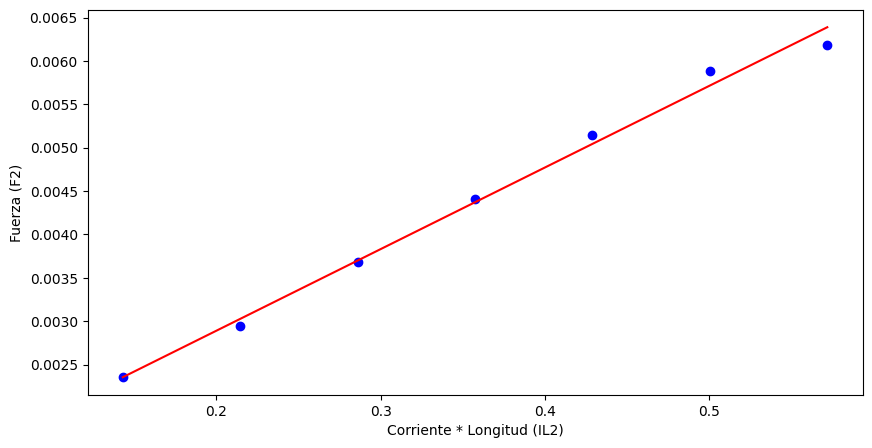

In [87]:
#SEGUNDA GRAFICA ESPIRA CONSTANTE A 2A

def linear_regression1(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    def model(x):
        return slope * x + intercept
    
    r_squared = r_value**2
    
    print('Pendiente (slope):', slope)
    print('Intersección (intercept):', intercept)
    print('Coeficiente de correlación (r):', r_value)
    print('Coeficiente de determinación (R^2):', r_squared)
    print('Valor p (p-value):', p_value)
    print('Error estándar (std_err):', std_err)
    
    return model, slope, intercept, r_squared, p_value, std_err

modelo2, pendiente2, interseccion2, r_cuadrado2, valor_p2, error_std2 = linear_regression1(i2, m2)


plt.figure(figsize=(10, 5))
plt.scatter(i2, m2, color='blue', label='Datos experimentales')
#plt.scatter(i1, m1, color='blue', label='Datos experimentales')
plt.plot(i2, modelo2(np.array(i2)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado2:.4f}$')
#plt.plot(i1, modelo(np.array(i1)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado:.4f}$')
plt.xlabel('Corriente * Longitud (IL2)')
plt.ylabel('Fuerza (F2)')
#plt.legend()
plt.show()

Pendiente (slope): -0.010864031073821289
Intersección (intercept): 0.016732222777222784
Coeficiente de correlación (r): -0.9157890613828962
Coeficiente de determinación (R^2): 0.838669604948566
Valor p (p-value): 0.00377568729494942
Error estándar (std_err): 0.0021309273513985733


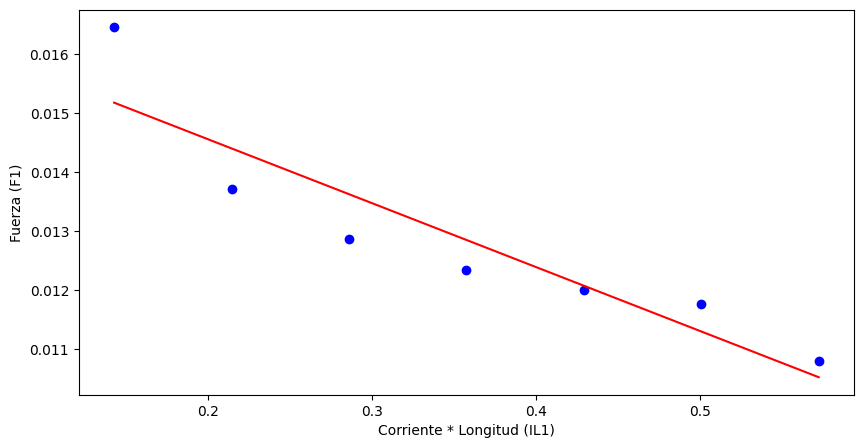

In [88]:
#PRIMERA GRÁFICA CON BOBINA CONSTANTE A 4A

def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    def model(x):
        return slope * x + intercept
    
    r_squared = r_value**2
    
    print('Pendiente (slope):', slope)
    print('Intersección (intercept):', intercept)
    print('Coeficiente de correlación (r):', r_value)
    print('Coeficiente de determinación (R^2):', r_squared)
    print('Valor p (p-value):', p_value)
    print('Error estándar (std_err):', std_err)
    
    return model, slope, intercept, r_squared, p_value, std_err


modelo, pendiente, interseccion, r_cuadrado, valor_p, error_std = linear_regression(i2, b2)


plt.figure(figsize=(10, 5))
plt.scatter(i2, b2, color='blue', label='Datos experimentales')
plt.plot(i2, modelo(np.array(i2)), color='red', label=f'Regresión lineal\n$R^2 = {r_cuadrado:.4f}$')
plt.xlabel('Corriente * Longitud (IL1)')
plt.ylabel('Fuerza (F1)')
#plt.legend()
plt.show()